# Exploratory Data Analysis (EDA) for Registration Data

For this notebook, I will analyze **registration data** from the **[Baku Higher Oil School Cinema Club](https://www.instagram.com/bhoscinema.club/)**.

The goal is to understand participant demographics, analyze registration patterns over time, identify popular universities and major categories, and explore course-level registration trends. This analysis will help the club optimize outreach strategies and better plan future movie sessions.

---

## Data Source

We will use cleaned and preprocessed registration dataset:

---

### **Registration Data** *(processed_registration_data.csv)*

Contains individual participant registration records with the following fields:

- **`participant_id`**
  Unique identifier for each participant.

- **`session_id`**
  Unique identifier for the movie session the participant registered for.

- **`registration_date`**
  Timestamp when the participant registered for the session.

- **`university_name_proper`**
  The proper name of the university the participant belongs to.

- **`major_category`**
  The broader academic field or category of the participant's major. Categories include:
  - **Business & Economics**
  - **STEM**
  - **Education & Environmental Studies**
  - **Arts, Humanities & Social Sciences**
  - **Health & Medical**
  - **Other/Not Specified**

- **`course`**
  The specific course the participant is studying. Course designations include:
  - **1**
  - **Foundation**
  - **4**
  - **2**
  - **3**
  - **5**

### 1. Import the Libraries

In [35]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


In [36]:
# Seaborn theme
sns.set_theme(
    style='darkgrid',
    palette='muted'
)

# Matplotlib rcParams
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11,
    'axes.edgecolor': 'gray',
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.color': 'lightgray',
})

### 2. Load the Data 

In [37]:
participants_df = pd.read_csv(r"C:\Users\avaza\Desktop\BHOS Cinema Club Data Analysis Project\data\processed\processed_registration_data.csv")

In [38]:
participants_df.head()

,participant_id,session_id,registration_date,university_name_proper,major_category,course
0,1,2,2023-11-01 20:10:45.452,Baku Higher Oil School,Business & Economics,1
1,2,7,2024-03-05 18:37:38.605,Baku Higher Oil School,STEM,Foundation
2,3,11,2025-01-28 12:44:15.940,Azerbaijan State Oil and Industry University,STEM,4
3,4,2,2023-11-01 19:03:13.035,Baku Higher Oil School,STEM,Foundation
4,4,6,2024-02-10 01:35:32.278,Baku Higher Oil School,STEM,Foundation


### 3. General Understanding of the Data

- **Data Types and Info**
- **Missing Values**
- **Descriptive Statistics**
- **Unique Categories**

In [39]:
participants_df.info()
# registration_date is object -> Convert to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   participant_id          1647 non-null   int64 
 1   session_id              1647 non-null   int64 
 2   registration_date       1647 non-null   object
 3   university_name_proper  1647 non-null   object
 4   major_category          1647 non-null   object
 5   course                  1647 non-null   object
dtypes: int64(2), object(4)
memory usage: 77.3+ KB


In [40]:
participants_df['registration_date'] = pd.to_datetime(participants_df['registration_date'], format="%Y-%m-%d %H:%M:%S.%f")

participants_df['registration_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1647 entries, 0 to 1646
Series name: registration_date
Non-Null Count  Dtype         
--------------  -----         
1647 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.0 KB


In [41]:
print("Missing Values in Participants Data:")
print(participants_df.isnull().sum())

Missing Values in Participants Data:
participant_id            0
session_id                0
registration_date         0
university_name_proper    0
major_category            0
course                    0
dtype: int64


In [42]:
print("Descriptive Statistics for Participants Data")
participants_df.describe()

Descriptive Statistics for Participants Data


,participant_id,session_id,registration_date
count,1647.000000,1647.000000,1647
mean,557.775956,6.889496,2024-06-06 15:12:04.150938112
min,1.000000,1.000000,2023-10-14 18:34:09.301000
25%,291.000000,3.000000,2023-11-21 05:50:58.555500032
50%,561.000000,7.000000,2024-03-02 20:27:37.638000128
75%,837.500000,10.000000,2024-12-26 04:33:33.197500160
max,1102.000000,13.000000,2025-05-20 09:34:34.574000
std,318.118839,3.824673,NaN


In [43]:
# Unique Values
print("Major Categories:", participants_df['major_category'].unique().tolist())
print("Universities:", participants_df['university_name_proper'].unique().tolist())

Major Categories: ['Business & Economics', 'STEM', 'Education & Environmental Studies', 'Arts, Humanities & Social Sciences', 'Health & Medical', 'Other/Not Specified']
Universities: ['Baku Higher Oil School', 'Azerbaijan State Oil and Industry University', 'Azerbaijan State Academy of Physical Education and Sport', 'Baku State University', 'Khazar University', 'Azerbaijan State Pedagogical University', 'Azerbaijan State University of Economics (UNEC)', 'ADA University', 'National Aviation Academy', 'French-Azerbaijani University', 'Academy of Public Administration under the President of the Republic of Azerbaijan', 'Azerbaijan Medical University', 'Azerbaijan University of Languages', 'Azerbaijan State University of Culture and Arts', 'Turkey-Azerbaijan University', 'Azerbaijan University of Architecture and Construction', 'Azerbaijan Technical University', 'Baku Engineering University', 'Baku Music Academy', 'Simmons University (USA, Massachusetts)', 'School No. 1', 'Baku Eurasian Un

### 4. Visualizations

### Univariate Analysis:
**Univariate analysis** examines the distribution of a single variable at a time.

- Shape of the numaric variables
- Frequency of the categorical variables

### University Distribution

,University Name,Count,Percentage %
0,Baku Higher Oil School,1385,84.09
1,Azerbaijan State University of Economics (UNEC),51,3.10
2,Baku State University,36,2.19
3,ADA University,33,2.00
4,Azerbaijan State Oil and Industry University,21,1.28
5,Azerbaijan Medical University,15,0.91
6,French-Azerbaijani University,14,0.85
7,Azerbaijan Technical University,13,0.79
8,National Aviation Academy,13,0.79
9,Baku Engineering University,12,0.73


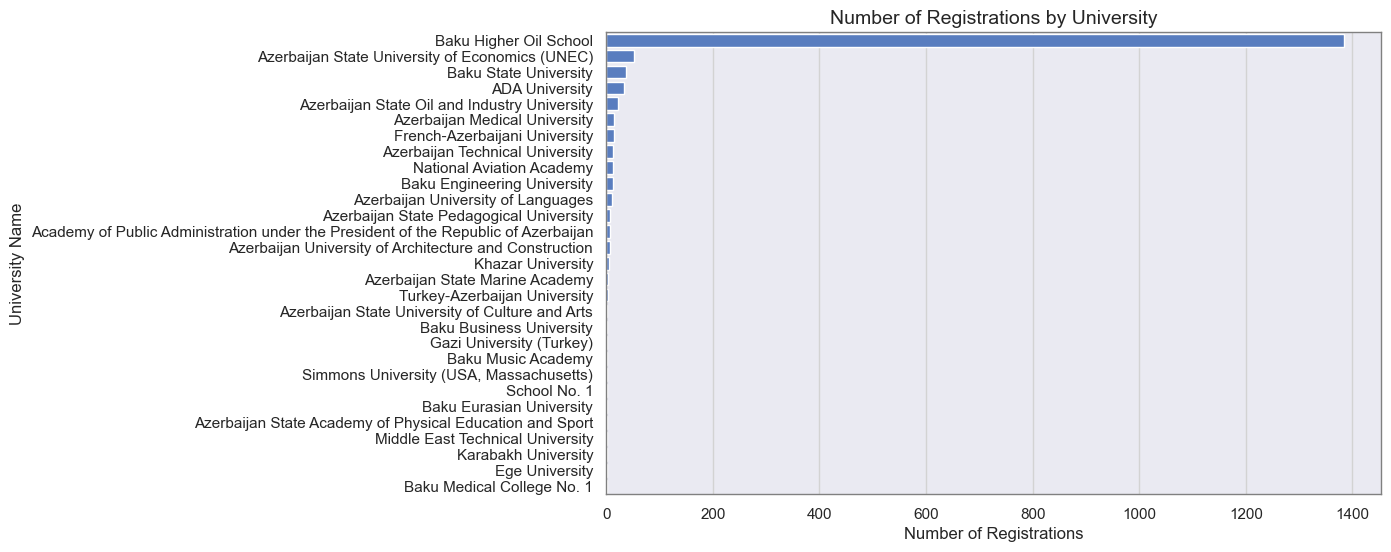

In [44]:
# Table
university_counts = participants_df['university_name_proper'].value_counts().reset_index()
university_counts.columns = ['University Name', 'Count']
university_counts['Percentage %'] = ((university_counts['Count'] / university_counts['Count'].sum()) * 100).round(2)

display(university_counts)

# Graph
sns.countplot(y='university_name_proper', data=participants_df, order=participants_df['university_name_proper'].value_counts().index)
plt.title('Number of Registrations by University')
plt.xlabel('Number of Registrations')
plt.ylabel('University Name')
plt.show()

### **Observations**

**Baku Higher Oil School (1385 registrations, 84.09%)**:  
  As expected, **Baku Higher Oil School** leads by a wide margin, accounting for the majority of the registrations. This is because the cinema club is associated with BHOS, making it the primary university for participants.

**Other Universities**:  
  Registrations from other universities are relatively fewer but still significant. Some notable registrations include:
- **Azerbaijan State University of Economics (UNEC)**: **51 registrations (3.1%)**.
- **Baku State University**: **36 registrations (2.19%)**.
- **ADA University**: **33 registrations (2.0%)**.
- **Azerbaijan State Oil and Industry University**: **21 registrations (1.28%)**.

**Smaller Universities**:  
  Other universities show minimal participation, with universities like **Azerbaijan Medical University** (**15 registrations**) and **Khazar University** (**5 registrations**) contributing small portions of the total registrations.

This distribution indicates that while BHOS dominates the participation in the cinema club, there is some engagement from students at other universities, particularly those within **Azerbaijan**.


### Major Distribution

,Major Category,Count,Percentage %
0,STEM,1314,79.78
1,Business & Economics,250,15.18
2,"Arts, Humanities & Social Sciences",46,2.79
3,Education & Environmental Studies,20,1.21
4,Health & Medical,16,0.97
5,Other/Not Specified,1,0.06


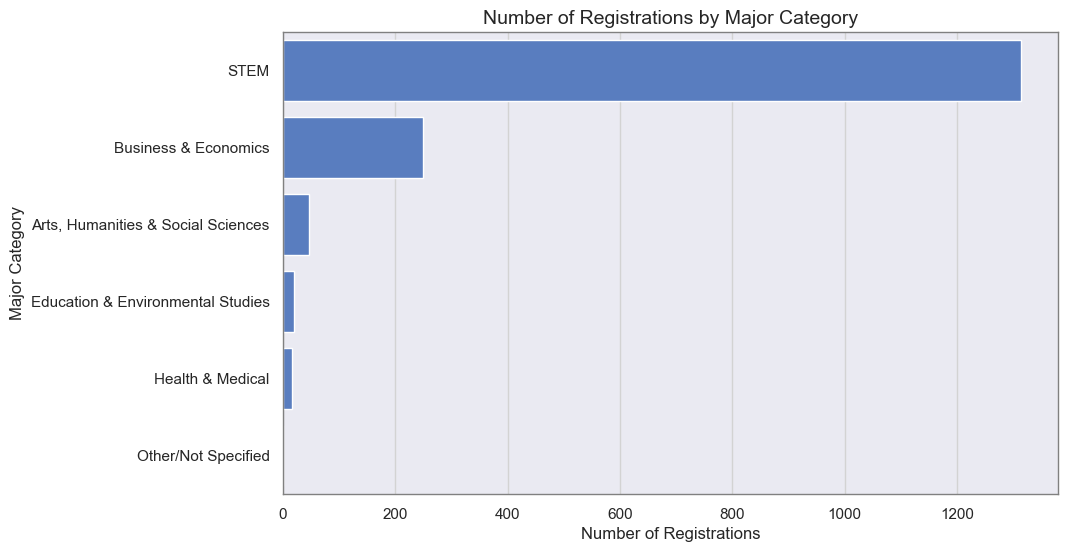

In [45]:
# Table
major_counts = participants_df['major_category'].value_counts().reset_index()
major_counts.columns = ['Major Category', 'Count']
major_counts['Percentage %'] = ((major_counts['Count'] / major_counts['Count'].sum()) * 100).round(2)

display(major_counts)

# Graph
sns.countplot(y='major_category', data=participants_df, order=participants_df['major_category'].value_counts().index)
plt.title('Number of Registrations by Major Category')
plt.xlabel('Number of Registrations')
plt.ylabel('Major Category')
plt.show()

### **Observations**

**1314 responses for STEM (79.78%)**:  
  The vast majority of participants are from the **STEM** (Science, Technology, Engineering, and Mathematics) major, which is consistent with the high representation of STEM students at **Baku Higher Oil School**. This suggests that the cinema club is highly popular among the STEM students, aligning well with the club's diverse and intellectually engaged audience.

**250 responses for Business & Economics (15.18%)**:  
  The second-largest group is from the **Business & Economics** major, which reflects the significant presence of students in business-related fields at **BHOS**. These students likely appreciate the opportunity to improve their English skills through the cinema club, which complements their academic focus.

**46 responses for Arts, Humanities & Social Sciences (2.79%)**:  
  A smaller portion of participants comes from the **Arts, Humanities & Social Sciences** major. While this group is less represented, it still shows that students from a wide range of disciplines are engaging with the cinema club.

**20 responses for Education & Environmental Studies (1.21%)**:  
  A small percentage of participants are from the **Education & Environmental Studies** major, indicating that the club appeals to students from various interdisciplinary backgrounds, though the participation rate is lower.

**16 responses for Health & Medical (0.97%)**:  
  The **Health & Medical** major contributes a minor portion to the overall feedback, suggesting limited participation from students in health-related fields.

**1 response for Other/Not Specified (0.06%)**:  
  A very small group of participants (0.06%) did not specify their major, which is likely due to a few exceptional cases or incomplete information.


### Course Distribution

,Course,Count,Percentage %
0,Foundation,987,59.93
1,1,281,17.06
2,2,241,14.63
3,3,90,5.46
4,4,44,2.67
5,5,4,0.24


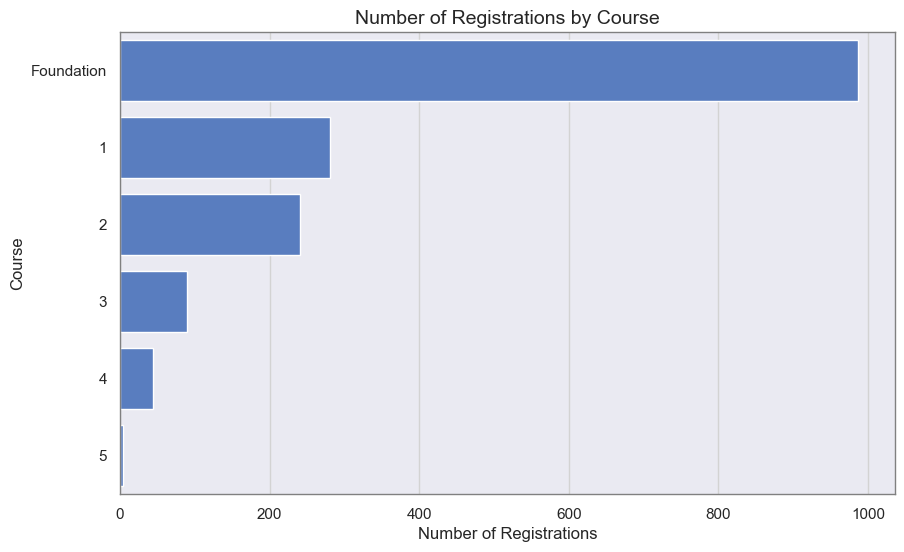

In [60]:
# Table
course_counts = participants_df['course'].value_counts().reset_index()
course_counts.columns = ['Course', 'Count']
course_counts['Percentage %'] = ((course_counts['Count'] / course_counts['Count'].sum()) * 100).round(2)

display(course_counts)

# Graph
sns.countplot(y='course', data=participants_df, order=participants_df['course'].value_counts().index)
plt.title('Number of Registrations by Course')
plt.xlabel('Number of Registrations')
plt.ylabel('Course')
plt.show()

### Observations  
**987 responses for Foundation (59.93%):**  
The majority of participants belong to the Foundation course, which aligns with the primary goal of the cinema club to help students improve their English proficiency through English-language movies. This indicates that the club is effectively engaging its target audience.

**281 responses for Course 1 (17.06%):**    
A significant portion of participants also comes from Course 1, showing strong interest in the club from students who are likely in the early stages of their academic journey.

**241 responses for Course 2 (14.63%):**  
The Course 2 students also make up a notable part of the feedback group, indicating continued interest in the cinema sessions as students progress through their studies.

**90 responses for Course 3 (5.46%):**  
A smaller portion of participants comes from Course 3, reflecting a slight decline in participation as students advance further into their academic programs.

**44 responses for Course 4 (2.67%):**  
Participation from Course 4 students is relatively low, suggesting that interest in the cinema sessions may diminish as students progress to higher academic levels.

**4 responses for Course 5 (0.24%):**  
The smallest group, Course 5, represents just a tiny fraction of the overall participation, possibly indicating very limited engagement from the final stages of the academic program.